## Exercise 1 : Fraudulent Transactions (Classification)
The file **fraud_prep.csv** contains credit card transactions. 
1. Evaluate multiple classification algorithms to identify whether the transactions are fraudulent or not.
1. Compare the performance of each model & identify the best performing one.
1. Present how your model generalizes and performs on unseen data.
1. Make sure to present all steps taken

**BONUS Points :** Can you think of some **unsupervised** methods to accomplish this same task? If so, describe them (do not script them)

In [1]:
import numpy as np
from pandas import DataFrame
from pandas import read_csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the fraud dateset as pandas DataFrame

fraud = read_csv('fraud_prep.csv')

In [3]:
# Looking for missing values

#fraud.isna().head()
fraud.isnull().values.any()

False

In [4]:
# Look at the dataframe dimensions

print(fraud.shape)

(284807, 31)


In [5]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
fraud.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
# Look at the basic statistics

fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Check if there are duplicate rows

mask = fraud.duplicated(subset=['V1', 'V2', 'V3'])
dup = fraud[mask]
print(dup.shape)
dup.head()

(9144, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0


$\Longrightarrow$ V1-V28 show $E$($X$) = 0 and decrease variance, from V1 with $\sigma^2 \simeq 1.96^2$ to V28, $\simeq 0.33^2$. Amount has float "zero" values. There are duplicated rows ($\sim$ 3.2%). They will be removed in the preprocessing phase. 

In [9]:
# Look at the Classes

a = fraud.groupby('Class').size()
a

Class
0    284315
1       492
dtype: int64

In [10]:
b = (a[1]/(a[0]+a[1]))*100
c = 100-b
print("Original Sample: %.3f:%.3f" % (b,c))

Original Sample: 0.173:99.827


**Highly unbalanced data**. There are several methods that deals with learning from unbalanced datasets (Pozzolo 2015): 

1. Data Level - the unbalanced strategies are used as a pre-processing step to rebalance the dataset or to remove the noise between the two classes
    - sampling
    - ensemble
    - cost-based (sample the data to reproduce the different costs associated to each class)
    - distance-based
    - hybrid
1. Algorithmic Level - algorithms are adjusted to deal with the minority class detection
    - classifiers that are specifically designed to deal with unbalanced distribution
    - classifiers that minimize overall classification cost (cost-sensitive classifiers, directly minimize the costs by using cost specific loss function)

Below I review some of the sampling methods proposed in the literature:

- Random undersampling
- Oversampling
    - Random oversampling
    - Adaptive Synthetic Sampling Approach for Imbalanced Learning (ADASYN)
    - Synthetic minority oversampling technique (SMOTE)
    - Modified Synthetic minority oversampling technique (MSMOTE)
- Combination of over- and under-sampling (Hybrid sampling)
    - SMOTE and Edited Nearest Neighbours (SMOTEENN)
    - SMOTE and Tomek links (SMOTETomek)
    - Selective preprocessing of imbalanced data (SPIDER)

#### References:

Dataset: ULB Machine Learning Group (http://mlg.ulb.ac.be/); Kaggle (https://www.kaggle.com/mlg-ulb/creditcardfraud)

1.  Awoyemi, J. O., Adetunmbi, A. O., Oluwadare, S. A., (2017). *Credit card fraud detection using machine learning techniques: A comparative analysis*. International Conference on Computing Networking and Informatics (ICCNI) (https://ieeexplore.ieee.org/document/8123782/)
1. Pozzolo, A. D., Caelen, O., Johnson, R. A., and Bontempi, G., (2015). *Calibrating Probability with Undersampling for Unbalanced Classification*. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE. (https://ieeexplore.ieee.org/document/7376606/)
1. Pozzolo, A. D. (2015). *Adaptive Machine Learning for Credit Card Fraud Detection*. Ph.D. Thesis, Université Libre de Bruxelles (https://dalpozz.github.io/static/pdf/Dalpozzolo2015PhD.pdf)

In [11]:
# Calculate the moments
# Check Gaussianity (skewness = 0, kurtosis = 3)

means = fraud.mean()
stds = fraud.std()
skews = fraud.skew()
kurts = fraud.kurt()

In [12]:
dic = {'mean': means[0:30], 'std': stds[0:30], 'skewness': skews[0:30], 'kurtosis': kurts[0:30]}
statsAtrr = DataFrame(dic)

In [13]:
statsAtrr

,mean,std,skewness,kurtosis
Time,9.481386e+04,47488.145955,-0.035568,-1.293530
V1,3.919560e-15,1.958696,-3.280667,32.486679
V2,5.688174e-16,1.651309,-4.624866,95.773106
V3,-8.769071e-15,1.516255,-2.240155,26.619551
V4,2.782312e-15,1.415869,0.676292,2.635455
V5,-1.552563e-15,1.380247,-2.425901,206.904560
V6,2.010663e-15,1.332271,1.826581,42.642494
V7,-1.694249e-15,1.237094,2.553907,405.607417
V8,-1.927028e-16,1.194353,-8.521944,220.586974
V9,-3.137024e-15,1.098632,0.554680,3.731311


## Attributes - What do they mean?

p.s. I adopted this first approach before finding the discription of the dataset in the references shown above.

Let's give a first look to the 3rd and 4th moments, skewness ($\xi$) and kurtosis ($\kappa$). It's interesting to identify at least 3 classes of attributes based on their distributions:

- with nearly Gaussian distributions ($\xi\sim 0$ and $\kappa\sim 3$)
- with very sharp distributions ($\kappa>> 3$)
- with flat distributions ($\kappa< 1$)

Variables that are usually used for credit card fraud detection are derived from combination of transaction and past transactions history. At least five main types of variables are considered ([Awoyemi et al. 2017](https://ieeexplore.ieee.org/document/8123782/)):
1. **all transactions statistics** - the general card usage profile
1. **regional statistics** - spending habits taken into account the geographical regions
1. **merchant type statistics** - usage in different merchant categories
1. **time-based amount statistics** - usage profile with respect to amounts vs. time ranges
1. **time-based number of transactions statistics** - usage profile with respect to frequencies vs. time ranges

The statistics could be focused on cardholder profile or card profile.

## Attributes investigation

In [14]:
mask = fraud['Class'].map(lambda x: x==1)
fraudPos = fraud[mask]
fraudNeg = fraud[~mask]

## V1 - V28

### Nearly Gaussian distributions (skew ~ 0 and kurt ~ 1.5-4.5)

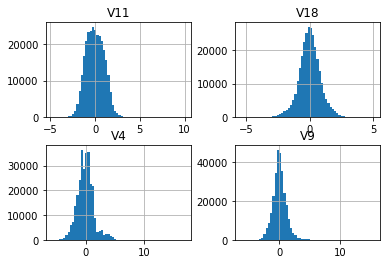

In [15]:
# Genuine transactions
# 
fraudNeg.hist(column = ['V4','V9','V11','V18'], bins = 60)
plt.show()

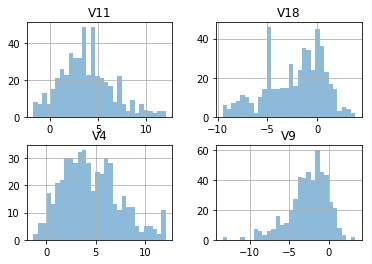

In [16]:
# Fraudulent transactions
# 
fraudPos.hist(column = ['V4','V9','V11','V18'], bins = 30, alpha = 0.5)
plt.show()

***Fraudulent transactions show different distributions, i.e. mean, std,.. good separability.***

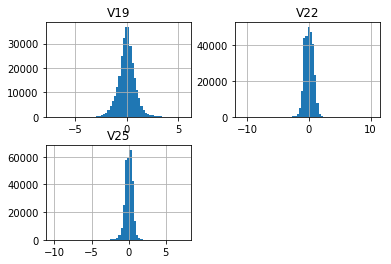

In [17]:
# Genuine transactions
# 
fraudNeg.hist(column = ['V19','V22','V25'], bins = 60)
plt.show()

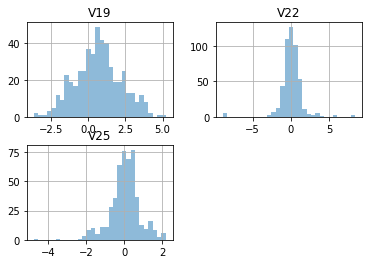

In [18]:
# Fraudulent transactions
#
fraudPos.hist(column = ['V19','V22','V25'], bins = 30, alpha = 0.5)
plt.show()

### Sharp distributions (kurt >> 3)

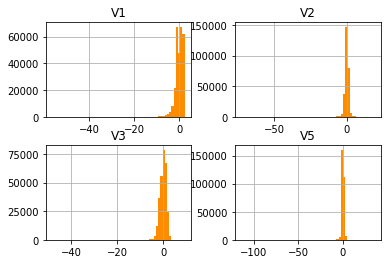

In [19]:
# Genuine transactions
# 
fraudNeg.hist(column = ['V1','V2','V3','V5'], bins = 60, color = 'darkorange')
plt.show()

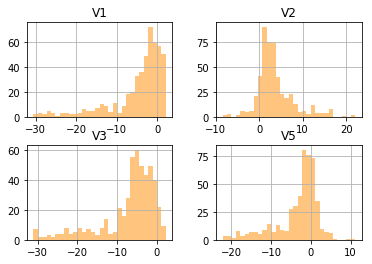

In [20]:
# Fraudulent transactions
# 
fraudPos.hist(column = ['V1','V2','V3','V5'], bins = 30, color = 'darkorange', alpha = 0.5)
plt.show()

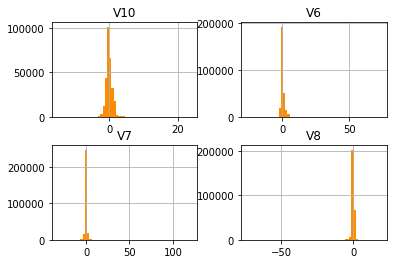

In [21]:
# Genuine transactions
# 
fraudNeg.hist(column = ['V6','V7','V8','V10'], bins = 60, color = 'darkorange')
plt.show()

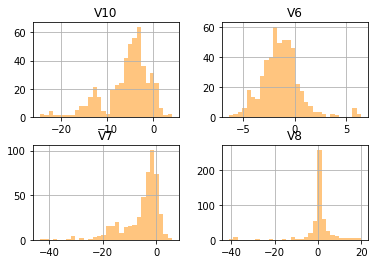

In [22]:
# Fraudulent transactions
# 
fraudPos.hist(column = ['V6','V7','V8','V10'], bins = 30, color = 'darkorange', alpha = 0.5)
plt.show()

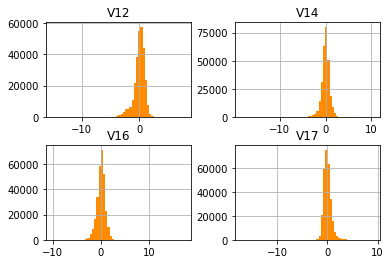

In [23]:
# Genuine transactions
# 
fraudNeg.hist(column = ['V12','V14','V16','V17'], bins = 60, color = 'darkorange')
plt.show()

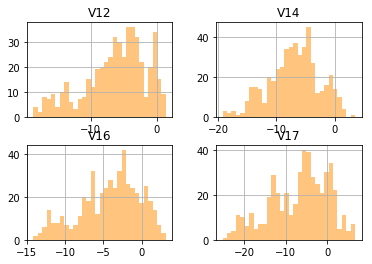

In [24]:
# Fraudulent transactions
# 
fraudPos.hist(column = ['V12','V14','V16','V17'], bins = 30, color = 'darkorange', alpha = 0.5)
plt.show()

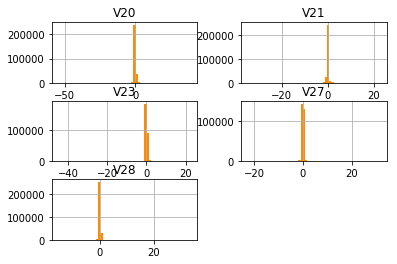

In [25]:
# Genuine transactions
# 
fraudNeg.hist(column = ['V20','V21','V23','V27','V28'], bins = 60, color = 'darkorange')
plt.show()

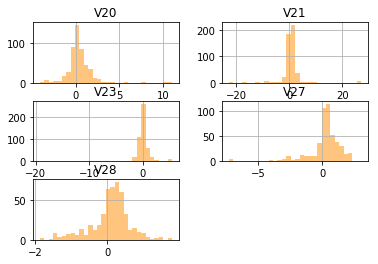

In [26]:
# Fraudulent transactions
# 
fraudPos.hist(column = ['V20','V21','V23','V27','V28'], bins = 30, color = 'darkorange', alpha = 0.5)
plt.show()

### Flat distributions (kurt < 1)

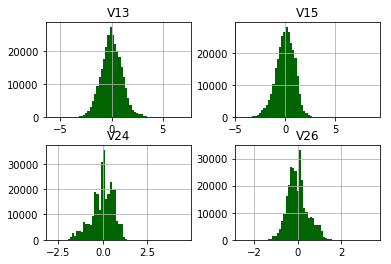

In [27]:
# Genuine transactions
# 
fraudNeg.hist(column = ['V13','V15','V24','V26'], bins = 60, color = 'darkgreen')
plt.show()

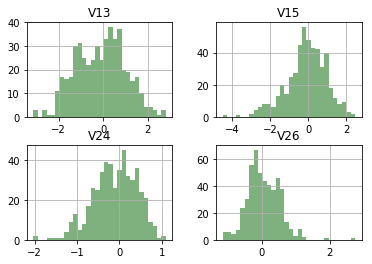

In [28]:
# Fraudulent transactions
# 
fraudPos.hist(column = ['V13','V15','V24','V26'], bins = 30, color = 'darkgreen', alpha = 0.5)
plt.show()

### Time and Amount

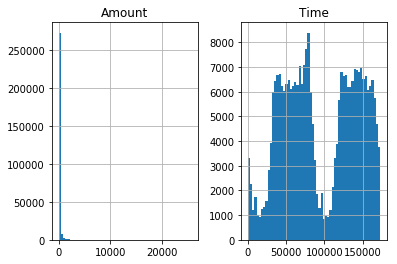

In [29]:
# Genuine transactions
# 
fraudNeg.hist(column = ['Time','Amount'], bins = 60)
plt.show()

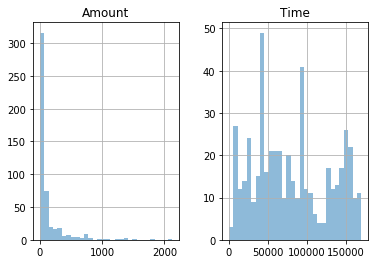

In [30]:
# Fraudulent transactions
# 
fraudPos.hist(column = ['Time','Amount'], bins = 30, alpha = 0.5)
plt.show()

$\Longrightarrow$ **Time** is seasonal and will be transformed to a single period in the preprocessing phase. It will reduce the variance without loss of information.

## Correlations

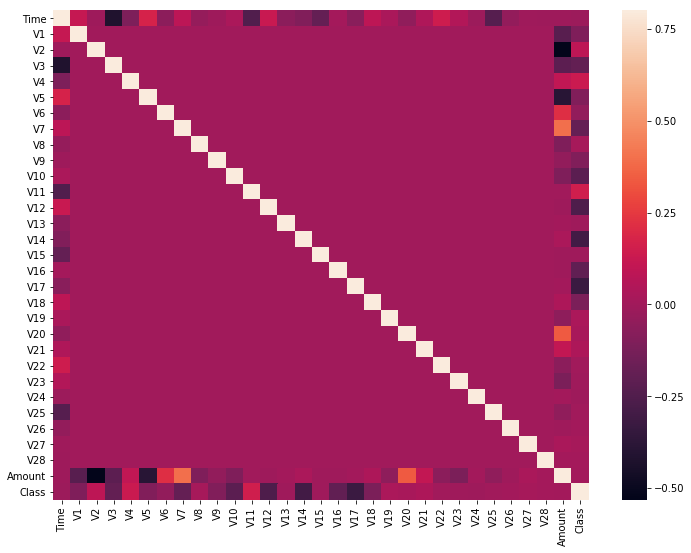

In [31]:
import seaborn as sns

corrmat = fraud.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

In [32]:
corrT = fraud.corr(method = 'pearson').round(4)
corrT = corrT.sort_values(by=['Class'])
corrT['Class']

V17      -0.3265
V14      -0.3025
V12      -0.2606
V10      -0.2169
V16      -0.1965
V3       -0.1930
V7       -0.1873
V18      -0.1115
V1       -0.1013
V9       -0.0977
V5       -0.0950
V6       -0.0436
Time     -0.0123
V24      -0.0072
V13      -0.0046
V15      -0.0042
V23      -0.0027
V22       0.0008
V25       0.0033
V26       0.0045
Amount    0.0056
V28       0.0095
V27       0.0176
V8        0.0199
V20       0.0201
V19       0.0348
V21       0.0404
V2        0.0913
V4        0.1334
V11       0.1549
Class     1.0000
Name: Class, dtype: float64

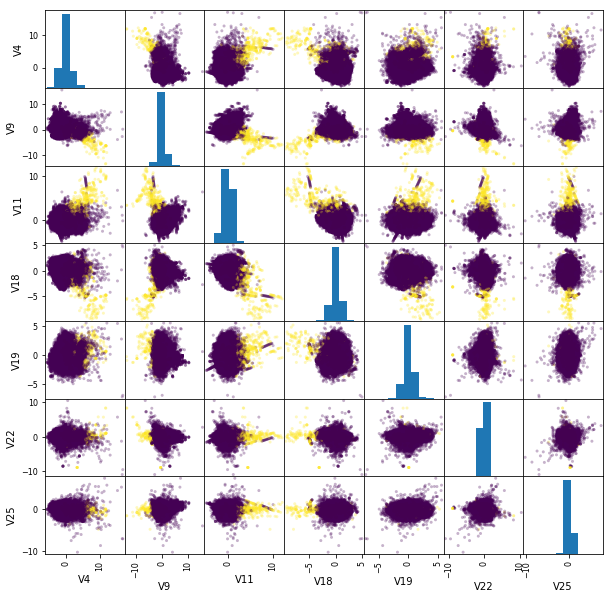

In [41]:
# It takes some time to process...

from pandas.plotting import scatter_matrix
scatter_matrix(fraud[['V4','V9','V11','V18','V19','V22','V25']], c=fraud['Class'], alpha = 0.3, figsize=(10, 10));

$\Longrightarrow$ The plot above suggests that unsupervised methods, such as **clustering based methods** could be used for classification.

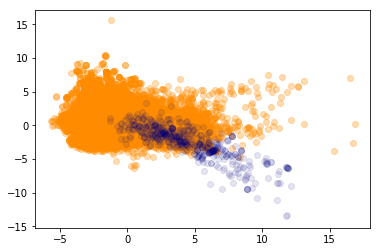

In [33]:
# A closer look
#
plt.figure()
plt.scatter(fraudNeg['V4'],fraudNeg['V9'], color = 'darkorange', alpha = 0.3)
plt.scatter(fraudPos['V4'],fraudPos['V9'], color = 'navy', alpha = 0.1)
plt.show()

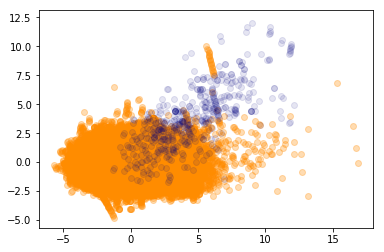

In [34]:
plt.figure()
plt.scatter(fraudNeg['V4'],fraudNeg['V11'], color = 'darkorange', alpha = 0.3)
plt.scatter(fraudPos['V4'],fraudPos['V11'], color = 'navy', alpha = 0.1)
plt.show()

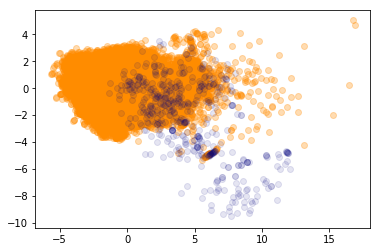

In [35]:
plt.figure()
plt.scatter(fraudNeg['V4'],fraudNeg['V18'], color = 'darkorange', alpha = 0.3)
plt.scatter(fraudPos['V4'],fraudPos['V18'], color = 'navy', alpha = 0.1)
plt.show()

In [36]:
# Compare the moments

meansN = fraudNeg.mean()
stdsN = fraudNeg.std()
skewsN = fraudNeg.skew()
kurtsN = fraudNeg.kurt()
meansP = fraudPos.mean()
stdsP = fraudPos.std()
skewsP = fraudPos.skew()
kurtsP = fraudPos.kurt()

In [37]:
dic = {'meanN': meansN[0:30], 'meanP': meansP[0:30],
       'stdN': stdsN[0:30], 'stdP': stdsP[0:30],
       'skewnessN': skewsN[0:30], 'skewnessP': skewsP[0:30],
       'kurtosisN': kurtsN[0:30], 'kurtosisP': kurtsP[0:30]}
statsAtrrC = DataFrame(dic)

In [38]:
statsAtrrC

,meanN,meanP,stdN,stdP,skewnessN,skewnessP,kurtosisN,kurtosisP
Time,94838.202258,80746.806911,47484.015786,47835.365138,-0.036015,0.251173,-1.293597,-1.154832
V1,0.008258,-4.771948,1.929814,6.783687,-3.130188,-1.797617,31.065568,2.879609
V2,-0.006271,3.623778,1.636146,4.291216,-4.887166,1.226561,98.406211,2.597563
V3,0.012171,-7.033281,1.459429,7.110937,-1.453676,-1.514985,14.545345,1.781004
V4,-0.007860,4.542029,1.399333,2.873318,0.581137,0.496746,2.095716,-0.197493
V5,0.005453,-3.151225,1.356952,5.372468,-2.213903,-1.361139,217.852170,1.728831
V6,0.002419,-1.397737,1.329913,1.858124,1.842604,0.867734,42.987534,2.876068
V7,0.009637,-5.568731,1.178812,7.206773,4.747800,-1.827599,452.920870,4.245361
V8,-0.000987,0.570636,1.161283,6.797831,-8.395492,-2.830022,209.772662,16.764743
V9,0.004467,-2.581123,1.089372,2.500896,0.665635,-0.975075,3.196847,1.494887


### Principal Component Analysis (PCA)

Understanding how variance are distributed in the **V1-V28 dataset**.

In [39]:
from sklearn.decomposition import PCA

array = fraud.values
X_PCA = array[:,1:6]

pca = PCA(n_components = 5)
fit = pca.fit(X_PCA)

print("Amount of variance: %s" % fit.explained_variance_)
print("Percentage of variance: %s" % fit.explained_variance_ratio_)
#sum(fit.explained_variance_ratio_)

Amount of variance: [3.83648925 2.72682002 2.29902924 2.00468382 1.90508105]
Percentage of variance: [0.30038038 0.21349812 0.18000396 0.156958   0.14915954]


In [40]:
compo = DataFrame(fit.components_)
compo.T

,0,1,2,3,4
0,-1.0,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
1,-0.0,-1.000000e+00,-3.330669e-16,-9.992007e-16,-2.220446e-16
2,-0.0,2.220446e-16,-1.000000e+00,7.982504e-14,-2.386980e-15
3,-0.0,-1.221245e-15,8.004708e-14,1.000000e+00,-4.102274e-14
4,-0.0,1.110223e-16,2.331468e-15,-4.096723e-14,-1.000000e+00


The PCA analysis shows that the ***features*** V1-V28 are in fact PCs of a larger dataset. It can be verified in the **Variance Matrix** above for the first 5 PCs. Each *feature* progressively assumes a **loading equal to 1**, while the others in the same PC assume **loadings equal to 0**. The loadings represent correlations between the PCs and the original features.

Since V1-V28 are PCs of a labeled dataset, we can alternatively use the original variances in the plot below:

Variance V1-V28:
[3.83648925 2.72682002 2.29902924 2.00468382 1.90508105 1.77494626
 1.53040057 1.42647886 1.20699247 1.18559381 1.04185508 0.99840342
 0.99057079 0.91890555 0.8378034  0.76781912 0.72137345 0.70253936
 0.66266194 0.59432539 0.53952553 0.52664275 0.38995066 0.36680837
 0.27173083 0.23254289 0.16291919 0.10895496]
Total Variance V1-V28:
30.73


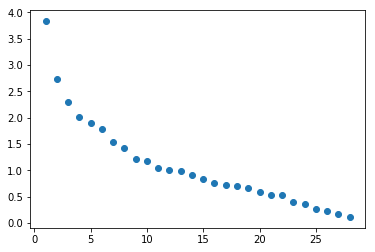

In [41]:
var = (fraud.std())**2
total_var = var[1:29].sum()

print('Variance V1-V28:')
print(var[1:29].values)
print('Total Variance V1-V28:')
print('%.2f' % (total_var))

plt.scatter(np.arange(1,29),var[1:29]);

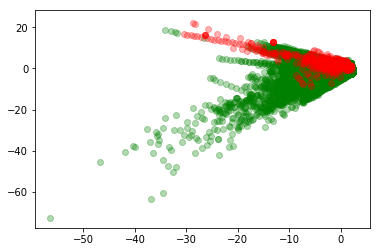

In [42]:
# Plotting the first 2 PCs (attributes/variables, V1 and V2)

plt.figure()
plt.scatter(fraudNeg['V1'],fraudNeg['V2'], color = 'green', alpha = 0.3)
plt.scatter(fraudPos['V1'],fraudPos['V2'], color = 'red', alpha = 0.3)
plt.show()

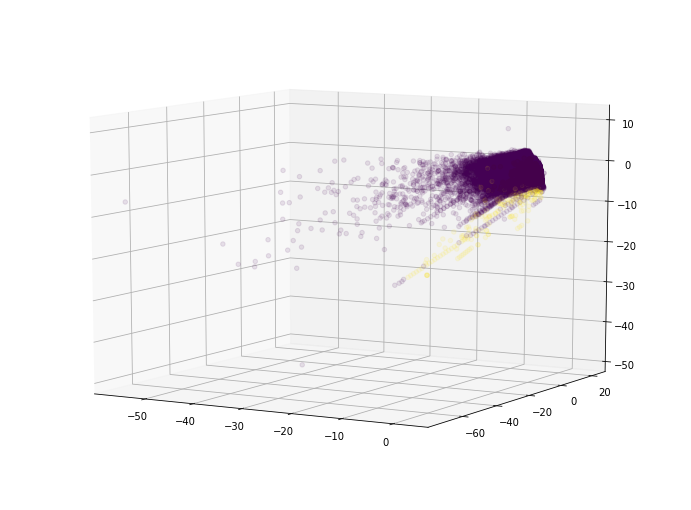

In [43]:
# Plotting the first 3 PCs (attributes/variables, V1-V3)

from mpl_toolkits.mplot3d import Axes3D

array = fraud.values

X = array[:,0:30]
y = array[:,30]

fig = plt.figure(figsize = (12, 9))
ax = plt.axes(projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3], c=y[:], alpha = 0.1)
ax.view_init(10, -60)
plt.show()

## Preprocessing

### Time transformation (removing daily seasonality)

Time will be transformed to a single period. Time(max) is 172792 which indicates continuous seconds for 2 days (172800s) of data acquisition.

In [43]:
# Find the index for Time = 86400s and Time = 172800s

print(fraud.index[fraud['Time'] == 86400].tolist())
print(fraud.index[fraud['Time'] == 172800].tolist())

[144786]
[]


In [44]:
# The dataset has not 2 days completed (8s is missing)
# Checking the indexes

print(fraud['Time'][144786])
print(fraud['Time'][284806])

86400.0
172792.0


In [45]:
# Removing daily seasonality

fraud.loc[144786:284806,'Time'] = fraud.loc[144786:284806,'Time']-86400

print(fraud['Time'].min())
print(fraud['Time'].max())

0.0
86398.0


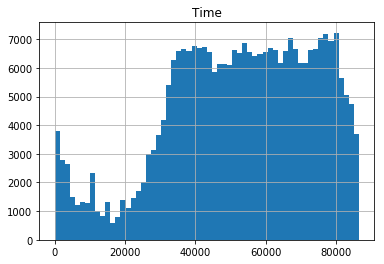

In [46]:
mask = fraud['Class'].map(lambda x: x==1)
fraudPos = fraud[mask]
fraudNeg = fraud[~mask]

# Genuine transactions
# 
fraudNeg.hist(column = ['Time'], bins = 60)
plt.show()

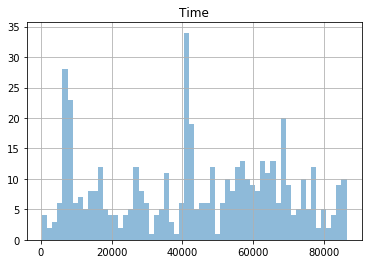

In [47]:
# Fraudulent transactions
# 

fraudPos.hist(column = ['Time'], bins = 60, alpha = 0.5)
plt.show()

### Cleaning duplicated rows

In [48]:
# How many samples are duplicated?

mask = fraud.duplicated(subset=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount','Class'])
dup = fraud[mask]
print(dup.shape)
dup.head()

(9144, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0


In [49]:
dup.groupby('Class').size()

Class
0    9125
1      19
dtype: int64

In [50]:
# Let's remove duplicated samples

fraud = fraud[~mask]
fraud.shape

(275663, 31)

About 3.9% of the fraudulent samples were removed and 3.2% of the genuine ones. The duplication effect seems to be random.

### Amount - spurious data?

In [51]:
# Amount has zero (float) values!

selec1 = fraud['Amount'].map(lambda x: x < 0.01)
a1 = fraud[selec1]
print('Number of transactions with Amount < 0.01 (1 cent) = %i' % (len(a1)))
selec2 = a1['Class'].map(lambda x: x==1)
a2 = a1[selec2]
print('Number of fraudulent transactions with Amount < 0.01 = %i' % (len(a2)))

Number of transactions with Amount < 0.01 (1 cent) = 1763
Number of fraudulent transactions with Amount < 0.01 = 25


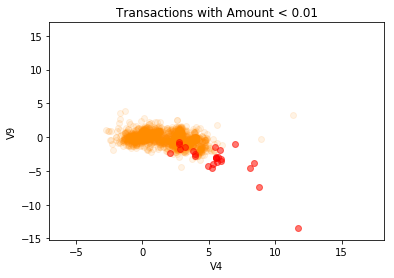

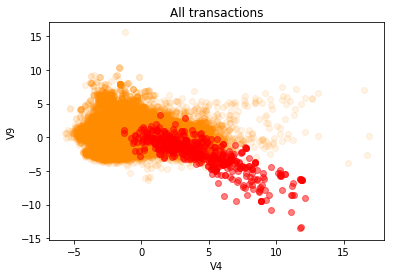

In [52]:
# How zero Amount transactions differ from transactions with accepted Amount values?

#plt.subplot(1, 2, 1)
plt.figure()
plt.scatter(a1['V4'],a1['V9'], color = 'darkorange', alpha = 0.1)
plt.scatter(a2['V4'],a2['V9'], color = 'red', alpha = 0.5)
plt.xlim(-7, 18.2)
plt.ylim(-15.2, 17)
plt.title('Transactions with Amount < 0.01')
plt.xlabel('V4')
plt.ylabel('V9')
#plt.show()
#plt.subplot(1, 2, 2)
plt.figure()
plt.scatter(fraudNeg['V4'],fraudNeg['V9'], color = 'darkorange', alpha = 0.1)
plt.scatter(fraudPos['V4'],fraudPos['V9'], color = 'red', alpha = 0.5)
plt.title('All transactions')
plt.xlabel('V4')
plt.ylabel('V9')
plt.show()

There is no intrinsec property for the samples with Amount < 0.01 (1 cent). They might be simply **outliers**. The origin of this is unknown, however, they may be transactions with communication failures, broken, canceled, reimbursements, etc... It's worth noting that fraudulent transactions show a much higher fraction of samples with Amount < 0.01, 27 in 492, $\sim$ 5.5% (original dataset). Genuine transactions show a fraction of $\sim$ 0.6%, 1798 in 284315. (original dataset)

Let's try an imputation method for Amount data for the samples with Amount < 0.01 using linear regression. Amount values will be predicted based on V1-V28 features. Genuine and fraudulent transaction amounts will be predicted together (future datasets won't labeled!).

### Imputation - regression method

Transactions with Amount > 0.01 (Good data):
(273900, 31)
Transactions with Amount < 0.01 (Bad data):
(1763, 31)


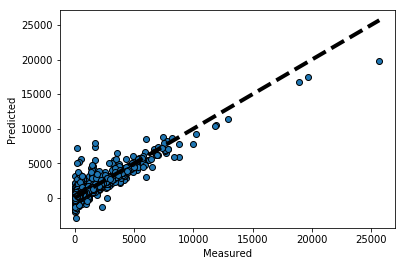

In [53]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

# DataFrames with transactions with Amount > 0.01 (Good) and Amount < 0.01 (Bad)
maskBad = fraud['Amount'].map(lambda x: x < 0.01)
fraudGood = fraud[~maskBad]
fraudBad = fraud[maskBad]
print('Transactions with Amount > 0.01 (Good data):')
print(fraudGood.shape)
print('Transactions with Amount < 0.01 (Bad data):')
print(fraudBad.shape)

# V1-V28 are going to predict Amount
X_Good = fraudGood.drop(['Time','Class','Amount'],1).values
y_Good = fraudGood['Amount'].values

X_Bad = fraudBad.drop(['Time','Class','Amount'],1).values

lr = linear_model.LinearRegression()
predicted = cross_val_predict(lr, X_Good, y_Good, cv=10)

lr.fit(X_Good, y_Good)
y_pred_Bad = lr.predict(X_Bad)

fig, ax = plt.subplots()
ax.scatter(y_Good, predicted, edgecolors=(0, 0, 0))
ax.plot([y_Good.min(), y_Good.max()], [y_Good.min(), y_Good.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [54]:
# Let's impute Amount data for the samples with Amount < 0.01 based on the predictions

idx_fraudBad = fraudBad.index.values
AmountReplace = DataFrame(y_pred_Bad, columns=['Amount'], index=idx_fraudBad)

# Imputation

fraud.loc[idx_fraudBad,'Amount'] = y_pred_Bad

In [55]:
# Predictions show in general reasonable values although a few show negative values
AmountReplace.head(5)

,Amount
383,25.473470
514,12.946942
534,10.489183
541,-24.798631
575,66.116951


In [56]:
fraud.loc[idx_fraudBad,'Amount'].head()

383    25.473470
514    12.946942
534    10.489183
541   -24.798631
575    66.116951
Name: Amount, dtype: float64

Number of transactions with Amount < 0.01 (1 cent) = 395
Number of fraudulent transactions with Amount < 0.01 = 19


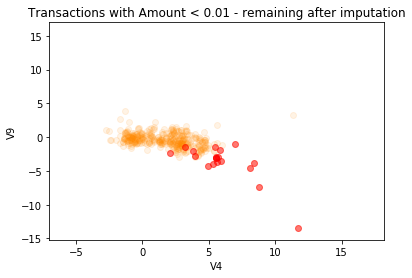

In [57]:
# Amount has zero (float) values

selec1 = fraud['Amount'].map(lambda x: x < 0.01)
a1 = fraud[selec1]
print('Number of transactions with Amount < 0.01 (1 cent) = %i' % (len(a1)))
selec2 = a1['Class'].map(lambda x: x==1)
a2 = a1[selec2]
print('Number of fraudulent transactions with Amount < 0.01 = %i' % (len(a2)))

plt.figure()
plt.scatter(a1['V4'],a1['V9'], color = 'darkorange', alpha = 0.1)
plt.scatter(a2['V4'],a2['V9'], color = 'red', alpha = 0.5)
plt.title('Transactions with Amount < 0.01 - remaining after imputation')
plt.xlim(-7, 18.2)
plt.ylim(-15.2, 17)
plt.xlabel('V4')
plt.ylabel('V9')
plt.show()

The imputation was effective for genuine transactions, but not that much for fraudulent transactions. Predicted values lower than 0.01 will be finaly fixed to 0.01.

In [58]:
# Let's fix (impute) the minimum value of a transaction to 0.01 (1 cent)

fraud['Amount'] = np.where(fraud['Amount'] < 0.01, 0.01, fraud['Amount'])
selec = fraud['Amount'].map(lambda x: x < 0.01)
a = fraud[selec]
print('Number of samples with Amount < 0.01 (1 cent) = %i' % (len(a)))

Number of samples with Amount < 0.01 (1 cent) = 0


## Resampling

In [59]:
# Working with numpy array from here beyond

#fraudC = fraud.drop(['V19','V20','V21','V22','V23','V24',
#                     'V25','V26','V27','V28'], axis=1)

array = fraud.values

X = array[:,0:30]
y = array[:,30]
idx_Amount = len(X[1,:])-1

seed = 24

print(X.shape)
type(X)
#print(idx_Amount)

(275663, 30)


numpy.ndarray

### Stratified Split (unbalanced dataset)

In [60]:
from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=seed, stratify=y)

$\Longrightarrow$ **X_test/y_test** will be used as the **unseen data**.

In [61]:
from pandas import DataFrame
straSSplit = DataFrame(y_test)
a2 = straSSplit.groupby(0).size()
a2

0
0.0    82557
1.0      142
dtype: int64

In [62]:
b2 = (a2[1]/(a2[0]+a2[1]))*100
c2 = 100-b2
print("Test Sample: %.3f:%.3f" % (b2,c2))

Test Sample: 0.172:99.828


### Under-sampling

Let's apply a **random under-sampling of the majority class** using [RandomUnderSampler](http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler) from [imbalanced-learn](http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html) package.

Undersampling is a simple and efficient technique commonly applied for highly unbalanced datasets. It also speeds up the learning phase for large datasets. Although rebalancing unbalanced data can introduce **sample selection bias**, several classifiers show better performance when trained on balanced datasets ([Pozzolo et al. 2015](https://ieeexplore.ieee.org/document/7376606/)).

Let's train and validate our models with the undersampled data (50:50):

- **X_res/y_res**: this dataset will contain all fraudulent transactions available after preprocessing (473:473). It will be used to fit the different models during cross-validation.

- The generalization performances will be estimated using an unseen (real-world) dataset (**X_test/y_test** 142:82557).

Since we are very limited on samples of fraudulent transactions, an ideal holdout method for model selection faces a trade-off. In order to have more samples during k-fold cross-validation, we pay the price of not having a true unseen test set to better estimate generalization performances. However, the code (see bellow) is prepared to work with a smaller sample (331:331) during cross-validation (compromising the training and model selection), which is a subsample of the X_train/y_train, leaving the X_test/y_test untouched until the generalization phase.

In [63]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=seed, return_indices=True) # (50:50)

X_res, y_res, idx_res = rus.fit_sample(X_train, y_train)
#X_res, y_res, idx_res = rus.fit_sample(X, y)

print(Counter(y_res))

Counter({0.0: 331, 1.0: 331})


In [64]:
# Option to remove Tomek’s links

#from imblearn.under_sampling import TomekLinks

#tl = TomekLinks(random_state=seed)

#X_res, y_res = tl.fit_sample(X_res, y_res)
#print(Counter(y_res))

### Standarization (0,1)

In [65]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

scalerT = StandardScaler().fit(X_train[:,[0]])
#scalerT = StandardScaler().fit(X[:,[0]])

X_train[:,[0]] = scalerT.transform(X_train[:,[0]])
X_test[:,[0]] = scalerT.transform(X_test[:,[0]])
X_res[:,[0]] = scalerT.transform(X_res[:,[0]])

scalerA = StandardScaler().fit(X_train[:,[idx_Amount]])
#scalerA = StandardScaler().fit(X[:,[idx_Amount]])

X_train[:,[idx_Amount]] = scalerA.transform(X_train[:,[idx_Amount]])
X_test[:,[idx_Amount]] = scalerA.transform(X_test[:,[idx_Amount]])
X_res[:,[idx_Amount]] = scalerA.transform(X_res[:,[idx_Amount]])

## Cross-Validation - Multiple Models (undersampled 50:50 dataset)

Before tunning each model separately, let's first compare their general performances doing cross-validation using the **resampled dataset**.

In [66]:
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Using all default setups for the models

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))

In [67]:
# Default parameters for each model
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('NB', GaussianNB(priors=None)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform')),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)),
 ('RFC',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_d

LR: 0.94 (+/- 0.02)
LDA: 0.90 (+/- 0.02)
NB: 0.92 (+/- 0.02)
KNN: 0.94 (+/- 0.02)
SVC: 0.94 (+/- 0.02)
RFC: 0.93 (+/- 0.02)


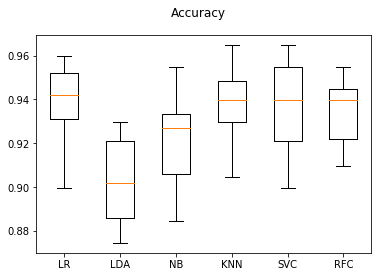

LR: 0.92 (+/- 0.03)
LDA: 0.83 (+/- 0.04)
NB: 0.88 (+/- 0.03)
KNN: 0.89 (+/- 0.03)
SVC: 0.92 (+/- 0.03)
RFC: 0.90 (+/- 0.02)


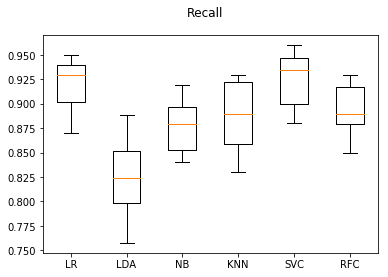

LR: 0.96 (+/- 0.02)
LDA: 0.98 (+/- 0.01)
NB: 0.96 (+/- 0.02)
KNN: 0.99 (+/- 0.02)
SVC: 0.95 (+/- 0.02)
RFC: 0.97 (+/- 0.02)


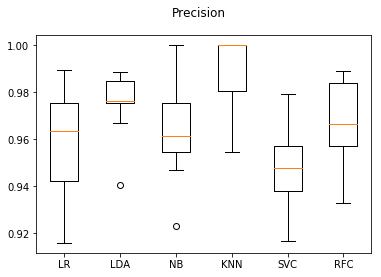

LR: 0.94 (+/- 0.02)
LDA: 0.90 (+/- 0.02)
NB: 0.92 (+/- 0.02)
KNN: 0.94 (+/- 0.02)
SVC: 0.94 (+/- 0.02)
RFC: 0.93 (+/- 0.02)


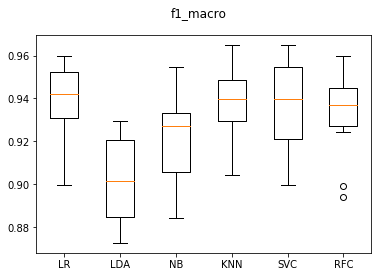

LR: 0.97 (+/- 0.01)
LDA: 0.97 (+/- 0.01)
NB: 0.96 (+/- 0.01)
KNN: 0.97 (+/- 0.02)
SVC: 0.97 (+/- 0.01)
RFC: 0.97 (+/- 0.01)


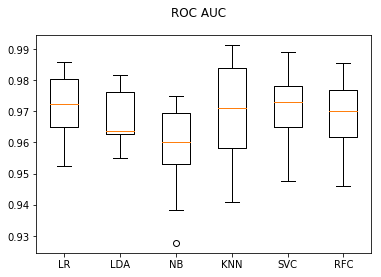

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

XX = X_res
yy = y_res

#StratifiedKFold is used by default for cv integer
#cv=10
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)

results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, XX, yy, cv = cv, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (+/- %.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, XX, yy, cv = cv, scoring = 'recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (+/- %.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Recall')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, XX, yy, cv = cv, scoring = 'precision')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (+/- %.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Precision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, XX, yy, cv = cv, scoring = 'f1_macro')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (+/- %.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('f1_macro')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, XX, yy, cv = cv, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (+/- %.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('ROC AUC')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Model Evaluation and Hyperparameter Tuning

### Logistic Regression

Tuning the LR model: $C$ (inverse of regularization strength)

## Validation Curve

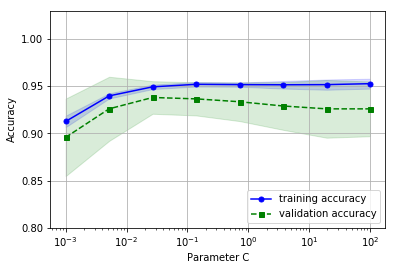

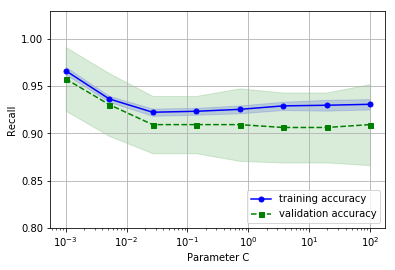

In [69]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline

#param_range = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
param_range = np.logspace(-3, 2, 8)

pipe_lr = make_pipeline(LogisticRegression(random_state=seed))

train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_res,
                                             y=y_res,
                                             param_name='logisticregression__C',
                                             param_range=param_range,
                                             cv=10, scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.03])
plt.show()

train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_res,
                                             y=y_res,
                                             param_name='logisticregression__C',
                                             param_range=param_range,
                                             cv=10, scoring='recall')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Recall')
plt.ylim([0.8, 1.03])
plt.show()

### Predict an unseen unbalanced testing set (0.173:99.827)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_curve, roc_auc_score

modelLR = LogisticRegression(C=0.005)
modelLR.fit(X_res, y_res)

pred = modelLR.predict(X_test)
decision_function = modelLR.decision_function(X_test)
y_prob = modelLR.predict_proba(X_test)
matrix = confusion_matrix(y_test, pred)
report = classification_report(y_test, pred)

print(matrix)
print(report)

from math import sqrt
TP=matrix[1,1]
TN=matrix[0,0]
FP=matrix[0,1]
FN=matrix[1,0]
acc = (TP+TN)/(TP+FP+TN+FN)
rec = TP/(TP+FN)
spe = TN/(TN+FP)
pre = TP/(TP+FP)
mcc = ((TP*TN)-(FP*FN))/sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
bcr = (rec+spe)/2
bs = brier_score_loss(y_test, y_prob[:,1])
auc = roc_auc_score(y_test, modelLR.decision_function(X_test))

print("Accuracy: %.3f" % (acc))
print("Sensitivity (Recall): %.3f" % (rec))
print("Specificity: %.3f" % (spe))
print("Precision: %.3f" % (pre))
print("Matthews Correlation Coeficient (MCC): %.3f" % (mcc))
print("Balanced Classification Rate (BCR): %.3f" % (bcr))
print("Brier Score (BS): %.3f" % (bs))
print("Area Under the ROC Curve (AUC): %.3f" % (auc))

[[77176  5381]
 [   14   128]]
             precision    recall  f1-score   support

        0.0       1.00      0.93      0.97     82557
        1.0       0.02      0.90      0.05       142

avg / total       1.00      0.93      0.96     82699

Accuracy: 0.935
Sensitivity (Recall): 0.901
Specificity: 0.935
Precision: 0.023
Matthews Correlation Coeficient (MCC): 0.139
Balanced Classification Rate (BCR): 0.918
Brier Score (BS): 0.153
Area Under the ROC Curve (AUC): 0.978


### The Precision-Recall Curve

Text(0.5,1,'2-class Precision-Recall curve: AP=0.56')

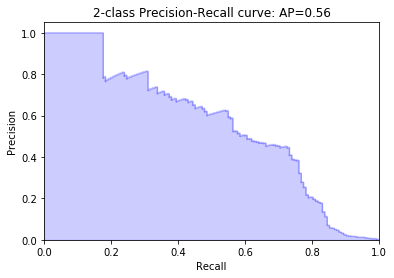

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

decision_function = modelLR.decision_function(X_test)
average_precision = average_precision_score(y_test, decision_function)

precision, recall, _ = precision_recall_curve(y_test, decision_function)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

## K-Nearest Neighbors (KNN)

Tuning the KNN: n_neighbors ($k$)

## Validation Curve

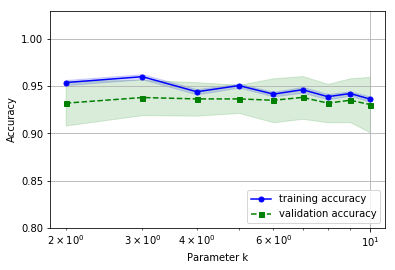

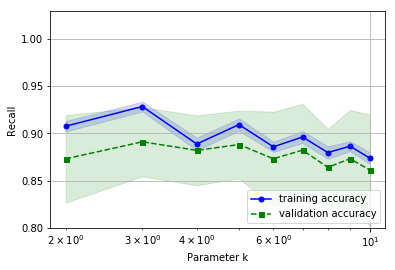

In [72]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
param_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]

pipe_lr = make_pipeline(KNeighborsClassifier())

train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_res,
                                             y=y_res,
                                             param_name='kneighborsclassifier__n_neighbors',
                                             param_range=param_range,
                                             cv=10, scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter k')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.03])
plt.show()

train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_res,
                                             y=y_res,
                                             param_name='kneighborsclassifier__n_neighbors',
                                             param_range=param_range,
                                             cv=10, scoring='recall')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter k')
plt.ylabel('Recall')
plt.ylim([0.8, 1.03])
plt.show()

### Predict an unseen unbalanced testing set (0.173:99.827)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import brier_score_loss


modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_res, y_res)

pred = modelKNN.predict(X_test)
y_prob = modelKNN.predict_proba(X_test)
matrix = confusion_matrix(y_test, pred)
report = classification_report(y_test, pred)

print(matrix)
print(report)

from math import sqrt
TP=matrix[1,1]
TN=matrix[0,0]
FP=matrix[0,1]
FN=matrix[1,0]
acc = (TP+TN)/(TP+FP+TN+FN)
rec = TP/(TP+FN)
spe = TN/(TN+FP)
pre = TP/(TP+FP)
mcc = ((TP*TN)-(FP*FN))/sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
bcr = (rec+spe)/2
bs = brier_score_loss(y_test, y_prob[:, 1])

print("Accuracy: %.3f" % (acc))
print("Sensitivity (Recall): %.3f" % (rec))
print("Specificity: %.3f" % (spe))
print("Precision: %.3f" % (pre))
print("Matthews Correlation Coeficient (MCC): %.3f" % (mcc))
print("Balanced Classification Rate (BCR): %.3f" % (bcr))
print("Brier Score (BS): %.3f" % (bs))

[[80448  2109]
 [   17   125]]
             precision    recall  f1-score   support

        0.0       1.00      0.97      0.99     82557
        1.0       0.06      0.88      0.11       142

avg / total       1.00      0.97      0.99     82699

Accuracy: 0.974
Sensitivity (Recall): 0.880
Specificity: 0.974
Precision: 0.056
Matthews Correlation Coeficient (MCC): 0.218
Balanced Classification Rate (BCR): 0.927
Brier Score (BS): 0.028


## Support Vector Classifier (SVC)

Tuning the SVC: penalty parameter ($C$) and polynomial kernel coefficient (gamma)

## Validation Curve

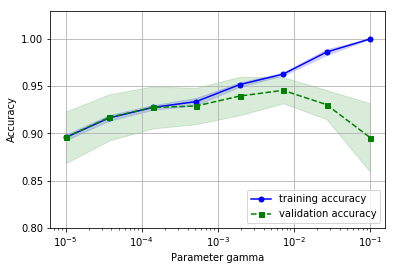

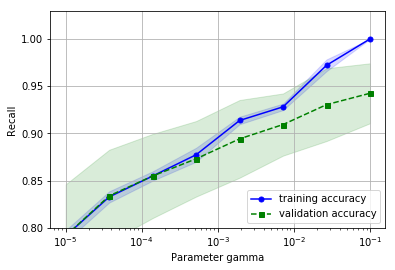

In [74]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

param_range = np.logspace(-5, -1, 8)

pipe_lr = make_pipeline(SVC(C=5))

train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_res,
                                             y=y_res,
                                             param_name='svc__gamma',
                                             param_range=param_range,
                                             cv=10, scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter gamma')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.03])
plt.show()

train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_res,
                                             y=y_res,
                                             param_name='svc__gamma',
                                             param_range=param_range,
                                             cv=10, scoring='recall')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter gamma')
plt.ylabel('Recall')
plt.ylim([0.8, 1.03])
plt.show()

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
#from sklearn.svm import LinearSVC

# each parameter setting do cross-validation:
for C in [1, 3, 5, 7, 9]:
    for gamma in [0.01, 0.03, 0.1]:
        scores = cross_val_score(SVC(C=C, gamma=gamma),
                                 X_res, y_res, cv=10, scoring='precision')
        print("C: %f, gamma: %f, average precision score: %f" % (C, gamma, scores.mean()))
        
# GridSearchCV() and grid.fit() could be used instead of a for loop.

C: 1.000000, gamma: 0.010000, average precision score: 0.978018
C: 1.000000, gamma: 0.030000, average precision score: 0.948826
C: 1.000000, gamma: 0.100000, average precision score: 0.865006
C: 3.000000, gamma: 0.010000, average precision score: 0.984920
C: 3.000000, gamma: 0.030000, average precision score: 0.952622
C: 3.000000, gamma: 0.100000, average precision score: 0.871790
C: 5.000000, gamma: 0.010000, average precision score: 0.981383
C: 5.000000, gamma: 0.030000, average precision score: 0.933214
C: 5.000000, gamma: 0.100000, average precision score: 0.864247
C: 7.000000, gamma: 0.010000, average precision score: 0.981009
C: 7.000000, gamma: 0.030000, average precision score: 0.927654
C: 7.000000, gamma: 0.100000, average precision score: 0.864247
C: 9.000000, gamma: 0.010000, average precision score: 0.981187
C: 9.000000, gamma: 0.030000, average precision score: 0.925831
C: 9.000000, gamma: 0.100000, average precision score: 0.864247


### Predict an unseen unbalanced testing set (0.173:99.827)

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import brier_score_loss

modelSVC = SVC(C=5, gamma=0.01, probability=True)
modelSVC.fit(X_res, y_res)

pred = modelSVC.predict(X_test)
y_prob = modelSVC.predict_proba(X_test)
matrix = confusion_matrix(y_test, pred)
report = classification_report(y_test, pred)

print(matrix)
print(report)

from math import sqrt
TP=matrix[1,1]
TN=matrix[0,0]
FP=matrix[0,1]
FN=matrix[1,0]
acc = (TP+TN)/(TP+FP+TN+FN)
rec = TP/(TP+FN)
spe = TN/(TN+FP)
pre = TP/(TP+FP)
mcc = ((TP*TN)-(FP*FN))/sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
bcr = (rec+spe)/2
#bs = brier_score_loss(y_test, y_prob[:, 1])
auc = roc_auc_score(y_test, modelSVC.decision_function(X_test))

print("Accuracy: %.3f" % (acc))
print("Sensitivity (Recall): %.3f" % (rec))
print("Specificity: %.3f" % (spe))
print("Precision: %.3f" % (pre))
print("Matthews Correlation Coeficient (MCC): %.3f" % (mcc))
print("Balanced Classification Rate (BCR): %.3f" % (bcr))
print("Brier Score (BS): %.3f" % (bs))
print("Area Under the ROC Curve (AUC): %.3f" % (auc))

[[80188  2369]
 [   14   128]]
             precision    recall  f1-score   support

        0.0       1.00      0.97      0.99     82557
        1.0       0.05      0.90      0.10       142

avg / total       1.00      0.97      0.98     82699

Accuracy: 0.971
Sensitivity (Recall): 0.901
Specificity: 0.971
Precision: 0.051
Matthews Correlation Coeficient (MCC): 0.211
Balanced Classification Rate (BCR): 0.936
Brier Score (BS): 0.028
Area Under the ROC Curve (AUC): 0.979


### The Precision-Recall Curve

Text(0.5,1,'2-class Precision-Recall curve: AP=0.26')

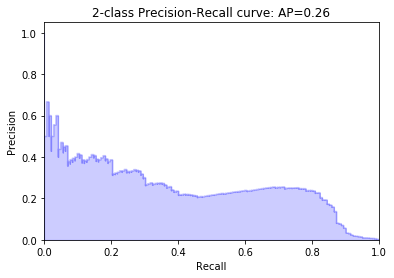

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

decision_function = modelSVC.decision_function(X_test)
average_precision = average_precision_score(y_test, decision_function)

precision, recall, _ = precision_recall_curve(y_test, decision_function)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

**Conclusion**: Here we estimated the generalization performances of some machine learning models on unseen data (highly imbalanced) containg credit card transactions. Random undersampling was adopted to balance the training set.

Logistic Regression, K-nearest Neighbors and Support Vector Machines present similar performances, however, **Logistic Regression** and **Support Vector Machines** are more flexible and allow customization by ajusting their regularization parameters.

**Logistic Regression** and **Support Vector Machines** can easily provide a recall score of 90% for a true unseen (real-world) dataset. However, for a given performance SVC shows a lower Brier Score (BS $\sim$ 0.030) indicating a better probability calibration.

## Unsupervised methods

Several unsupervised models could be used alternatively to accomplish this task. Clustering methods such as **K-Means Clustering** could be a first approach. The first V features in the dataset (principal components) could be selected as a direct dimensionality reduction.

Since fraudulent transactions are rare, methods based on anomaly detection must be consider. **Local Outlier Factor**, **Isolation Forest** and **One-Class SVM** should be tested. Again, the challenge here is to find the good set of features through feature selection that helps the algorithms to detect the outliers (anomalies).